**Overview:**
You are provided with an eCommerce Transactions dataset consisting of three files:
Customers.csv, Products.csv, and Transactions.csv. Your task is to perform
exploratory data analysis (EDA), build predictive models, and derive actionable insights. This
assignment will test your data analysis, machine learning, and business insight generation skills.
Customers.csv:

https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing

Products.csv :

https://drive.google.com/file/d/1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0/view?usp=sharing

Transactions.csv :

https://drive.google.com/file/d/1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF/view?usp=sharing

**Files Description:**
1. Customers.csv

○ CustomerID: Unique identifier for each customer.
    
○ CustomerName: Name of the customer.
    
○ Region: Continent where the customer resides.
    
○ SignupDate: Date when the customer signed up.

2. Products.csv

○ ProductID: Unique identifier for each product.
    
○ ProductName: Name of the product.

○ Category: Product category.
    
○ Price: Product price in USD.

3. Transactions.csv

○ TransactionID: Unique identifier for each transaction.
    
○ CustomerID: ID of the customer who made the transaction.

○ ProductID: ID of the product sold.

○ TransactionDate: Date of the transaction.

○ Quantity: Quantity of the product purchased.
    
○ TotalValue: Total value of the transaction.
    
○ Price: Price of the product sold.


**Importing Important Libraries**

In [3]:
import pandas as pd 
import seaborn as sns   
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.linear_model import LinearRegression 
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mse_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Customer dataset\Customers.csv")

In [5]:
z

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [6]:
a = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Customer dataset\Products.csv")

In [7]:
a

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [8]:
b = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Customer dataset\Transactions.csv")
b

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [9]:
z

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [10]:
merge1 = pd.merge(z, b , on = ["CustomerID"], how = "inner")

In [11]:
merge1

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64
...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,2024-12-11 03:05:50,4,868.20,217.05
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,2024-04-27 19:06:20,1,239.70,239.70
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,2024-07-15 20:36:28,4,627.84,156.96
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,2024-09-10 09:50:48,4,1665.60,416.40


<Axes: title={'center': 'Region vs TotalValue'}, xlabel='Region', ylabel='TotalValue'>

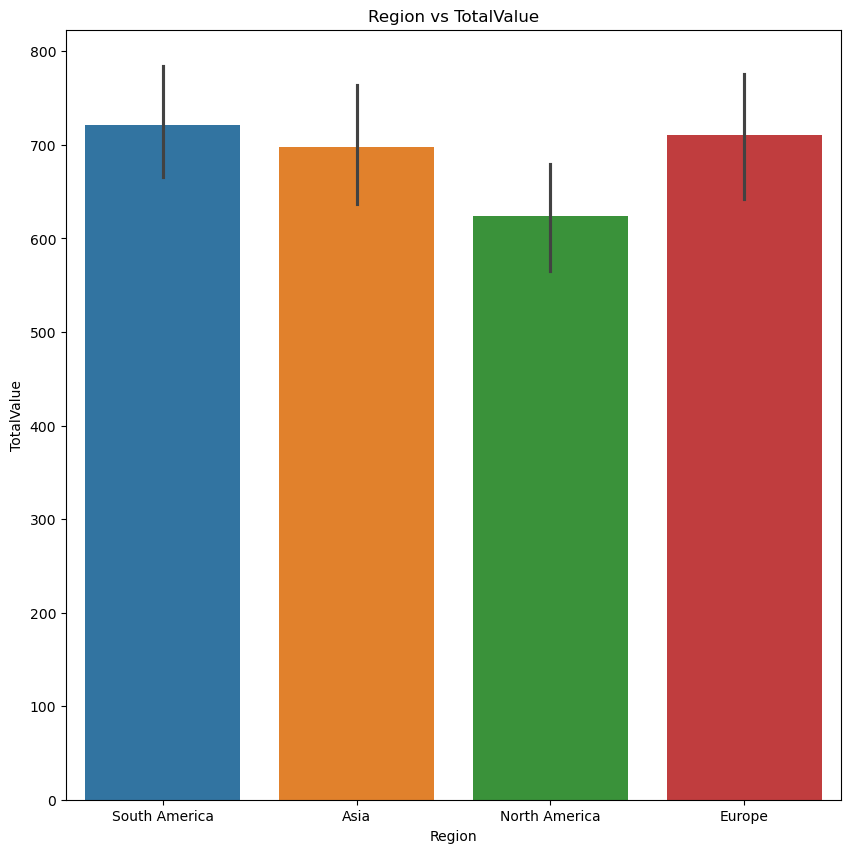

In [12]:
plt.figure(figsize = (10,10))
plt.title("Region vs TotalValue")
sns.barplot(x = merge1["Region"], y = merge1["TotalValue"], data = merge1, hue = merge1["Region"])

In [13]:
merge1[["Region", "TotalValue"]].groupby(["Region"])["TotalValue"].sum().sort_values(ascending = False)

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64

By ploting region vs total value using barplot we can say the following things:

1. South America region did maximum transaction 

2. Europe region is 2nd did maximum transaction

3. Asia region is  did minimum transaction 

By doing this visulization we can say that South America region  did  maximum transaction of 219352.56


In [15]:
a.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

<Axes: title={'center': 'Category vs Price'}, xlabel='Category', ylabel='Price'>

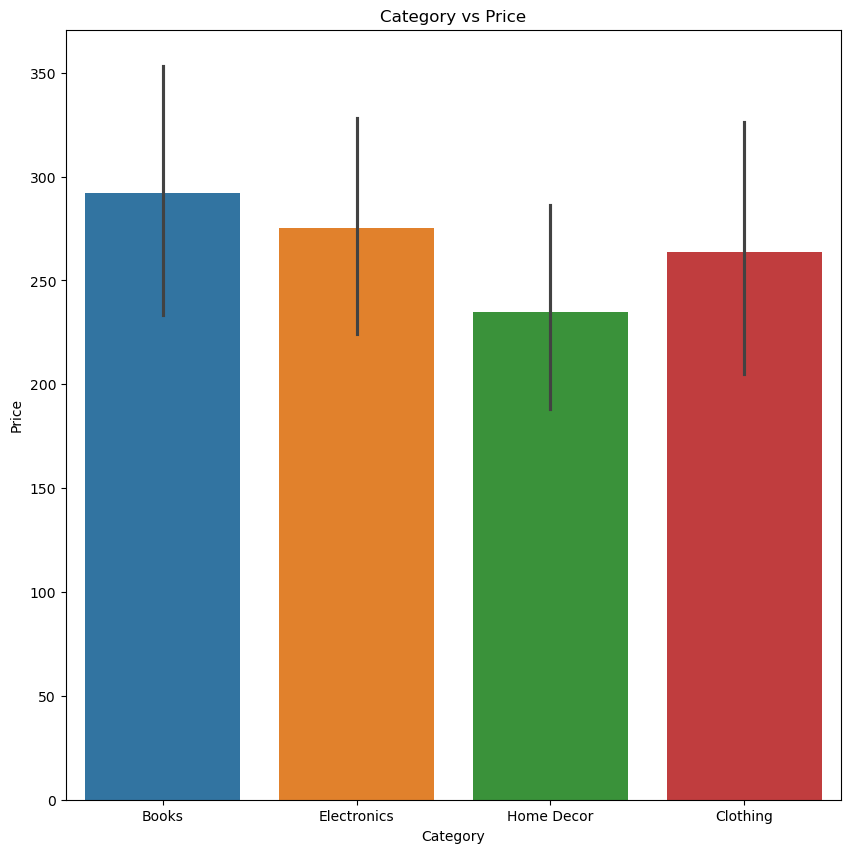

In [16]:
plt.figure(figsize = (10, 10))
plt.title("Category vs Price")
sns.barplot(x = a["Category"], y = a["Price"], data = a, hue = a["Category"])

In [17]:
a[["Category", "Price"]].groupby(["Category"])["Price"].sum().sort_values(ascending = False)

Category
Books          7597.52
Electronics    7159.19
Clothing       6593.00
Home Decor     5405.46
Name: Price, dtype: float64

By ploting Category vs Price  using barplot we can say followiing points:

1.Books have maximum price 

2.Electronics have 2nd maximum price 

3.Home Decor have minimum price

By ploting this visulization we can say that Books cateogory have maximum price of 7597.52.

In [19]:
a

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [20]:
b

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [21]:
a["Product Price"] = a["Price"]

In [22]:
b["Sold Price"] = b["Price"]

In [23]:
a.drop(["Price"], axis = 1, inplace = True)

In [24]:
b.drop(["Price"], axis = 1, inplace = True)

In [25]:
merge = pd.merge(a, b, on = ["ProductID"], how = "inner")

In [26]:
merge

,ProductID,ProductName,Category,Product Price,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,Sold Price
0,P001,ActiveWear Biography,Books,169.30,T00088,C0019,2024-01-30 17:23:03,2,338.60,169.30
1,P001,ActiveWear Biography,Books,169.30,T00314,C0024,2024-09-24 17:15:16,4,677.20,169.30
2,P001,ActiveWear Biography,Books,169.30,T00428,C0071,2024-08-02 08:13:23,2,338.60,169.30
3,P001,ActiveWear Biography,Books,169.30,T00433,C0036,2024-05-05 05:01:18,2,338.60,169.30
4,P001,ActiveWear Biography,Books,169.30,T00449,C0191,2024-12-12 12:17:38,1,169.30,169.30
...,...,...,...,...,...,...,...,...,...,...
995,P100,HomeSense Sweater,Clothing,126.34,T00115,C0161,2024-03-10 02:22:50,1,126.34,126.34
996,P100,HomeSense Sweater,Clothing,126.34,T00283,C0109,2024-07-16 14:50:07,4,505.36,126.34
997,P100,HomeSense Sweater,Clothing,126.34,T00301,C0109,2024-07-13 08:15:45,2,252.68,126.34
998,P100,HomeSense Sweater,Clothing,126.34,T00740,C0156,2024-08-24 19:10:31,4,505.36,126.34


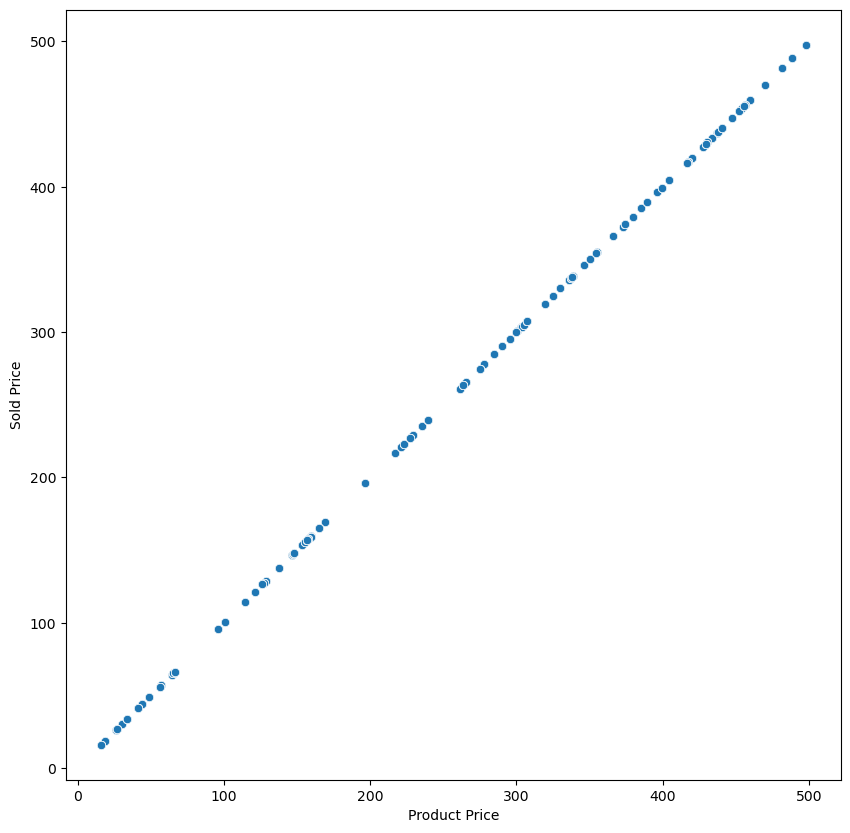

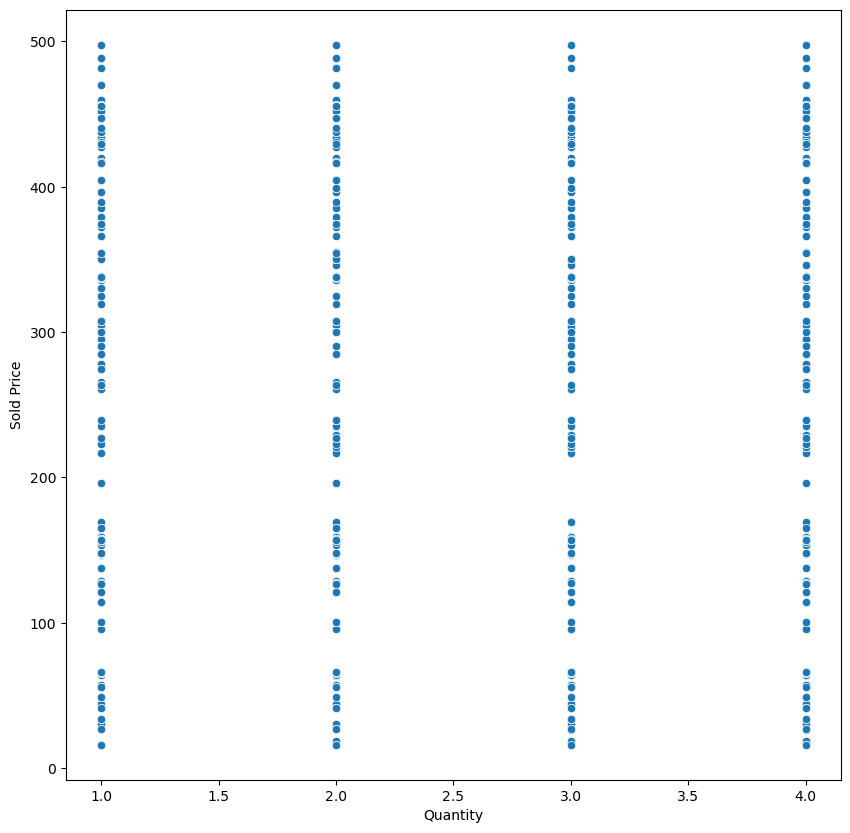

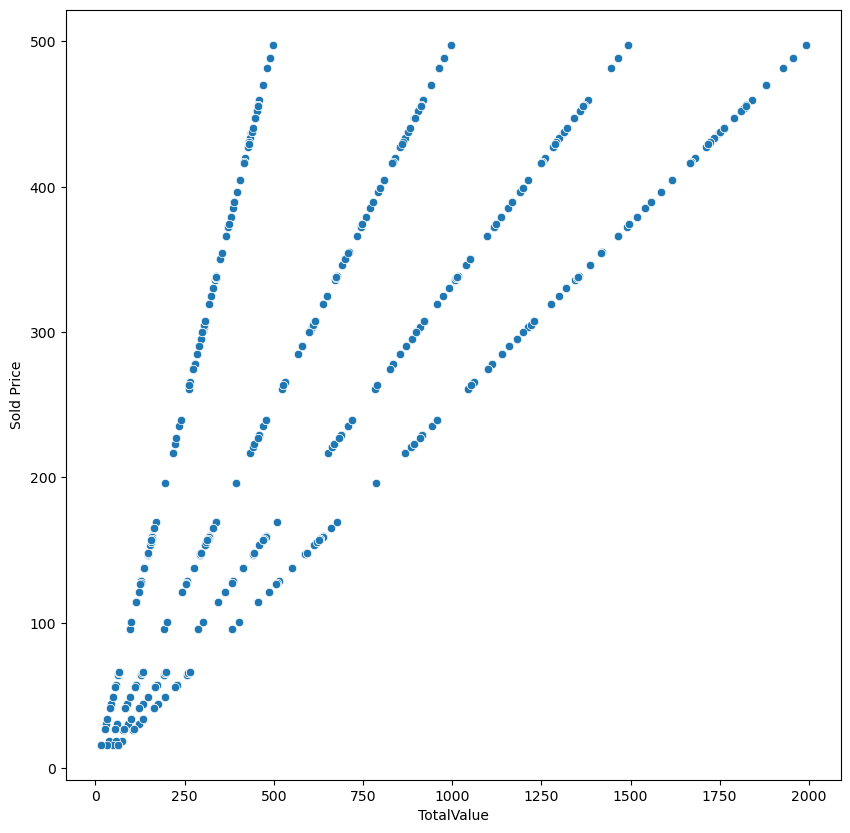

In [27]:
for i in merge:
    if(merge[i].dtype != "object") and ( i != "Sold Price"):
        plt.figure(figsize = (10, 10))
        sns.scatterplot(x = merge[i], y = merge["Sold Price"], data = merge)

In [28]:
b = merge.copy()
for i in b:
    if(b[i].dtype == "object"):
        b.drop([i], axis = 1, inplace = True)
b

,Product Price,Quantity,TotalValue,Sold Price
0,169.30,2,338.60,169.30
1,169.30,4,677.20,169.30
2,169.30,2,338.60,169.30
3,169.30,2,338.60,169.30
4,169.30,1,169.30,169.30
...,...,...,...,...
995,126.34,1,126.34,126.34
996,126.34,4,505.36,126.34
997,126.34,2,252.68,126.34
998,126.34,4,505.36,126.34


In [29]:
b.corr()

,Product Price,Quantity,TotalValue,Sold Price
Product Price,1.000000,-0.009378,0.722714,1.000000
Quantity,-0.009378,1.000000,0.609972,-0.009378
TotalValue,0.722714,0.609972,1.000000,0.722714
Sold Price,1.000000,-0.009378,0.722714,1.000000


<Axes: >

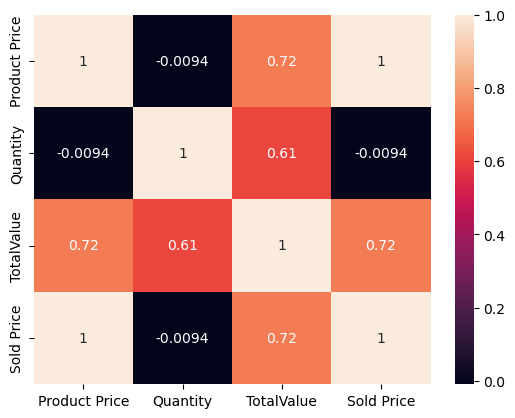

In [30]:
sns.heatmap(b.corr(), annot = True)

In [31]:
b

,Product Price,Quantity,TotalValue,Sold Price
0,169.30,2,338.60,169.30
1,169.30,4,677.20,169.30
2,169.30,2,338.60,169.30
3,169.30,2,338.60,169.30
4,169.30,1,169.30,169.30
...,...,...,...,...
995,126.34,1,126.34,126.34
996,126.34,4,505.36,126.34
997,126.34,2,252.68,126.34
998,126.34,4,505.36,126.34


<Axes: title={'center': 'Regression plot between Product Price vs Sold Price'}, xlabel='Product Price', ylabel='Sold Price'>

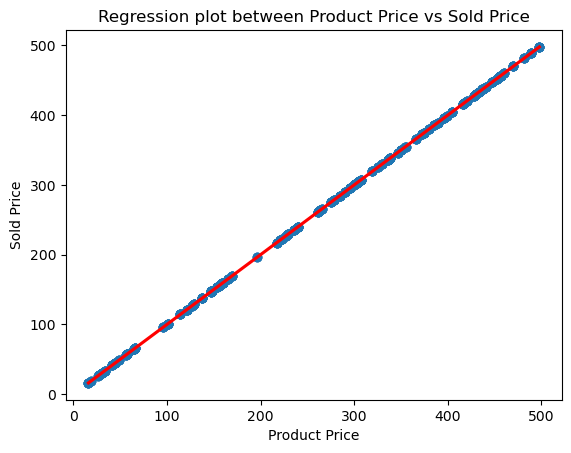

In [32]:
plt.title("Regression plot between Product Price vs Sold Price")
sns.regplot(x = b["Product Price"], y = b["Sold Price"], data = b, line_kws = {"color" : "red"})

In [33]:
b.corr()["Sold Price"]

Product Price    1.000000
Quantity        -0.009378
TotalValue       0.722714
Sold Price       1.000000
Name: Sold Price, dtype: float64

In [34]:
X = b["Product Price"]
Y = b["Sold Price"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size =0.7, test_size = 0.3, random_state = 100)

In [36]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [37]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [38]:
n = LinearRegression()
n.fit(x_train, y_train)

LinearRegression()

In [39]:
y_predict_train = n.predict(x_train)
r2_train = r2_score(y_true = y_train, y_pred = y_predict_train)


In [40]:
round(r2_train, 2)*100

100.0

In [41]:
mse_train = mse(y_true = y_train, y_pred = y_predict_train)
mse_train

6.214240511437017e-28

In [42]:
rmse_train = np.sqrt(mse_train)
rmse_train

2.492837842988793e-14

In [43]:
mse_error_train  = mse_error(y_true = y_train, y_pred = y_predict_train)
mse_error_train

1.5621789576211344e-14

In [44]:
y_predict_test = n.predict(x_test)
r2_test = r2_score(y_true = y_test, y_pred = y_predict_test)

In [45]:
round(r2_test, 2)*100

100.0

In [46]:
mse_test = mse(y_true = y_test, y_pred = y_predict_test)
mse_test

5.752163357963559e-28

In [47]:
rmse_test = np.sqrt(mse_test)
rmse_test

2.3983668105532895e-14

In [48]:
mse_error_test = mse_error(y_true = y_test, y_pred = y_predict_test)
mse_error_test

1.4874027935244763e-14

In [49]:
res_train = y_train - y_predict_train

In [50]:
res_train

array([[-5.32907052e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [-4.26325641e-14],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [-2.84217094e-14],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [-5.32907052e-14],
       [-4.26325641e-14],
       [-2.84217094e-14],
       [-2.84217094e-14],
       [-4.97379915e-14],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [-2.84217094e-14],
       [-4.26325641e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [-4.97379915e-14],
       [-5.3

<Axes: ylabel='Density'>

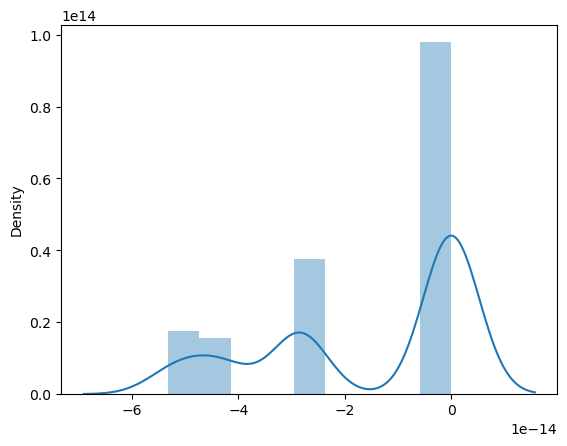

In [51]:
sns.distplot(res_train, kde = True)

In [52]:
res_test = y_test - y_predict_test

In [53]:
res_test

array([[-2.84217094e-14],
       [-2.84217094e-14],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [-5.32907052e-14],
       [-4.26325641e-14],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-5.32907052e-14],
       [-2.84217094e-14],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-4.26325641e-14],
       [-4.26325641e-14],
       [-4.97379915e-14],
       [ 0.00000000e+00],
       [-4.26325641e-14],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-2.84217094e-14],
       [ 0.00000000e+00],
       [-4.26325641e-14],
       [-5.32907052e-14],
       [ 0.00000000e+00],
       [-4.97379915e-14],
       [ 0.0

<Axes: ylabel='Density'>

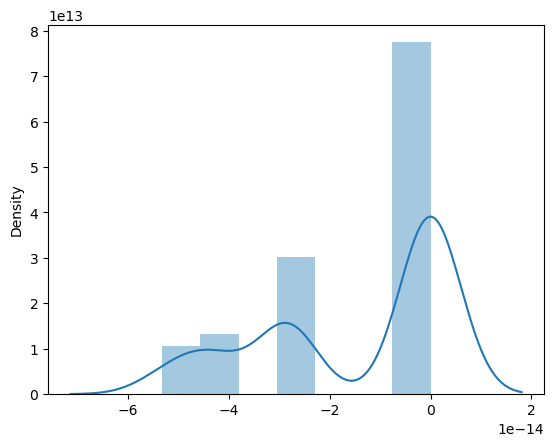

In [54]:
sns.distplot(res_test, kde = True)

**Give the top 3 lookalikes with there similarity scores for the first 20 customers**

In [56]:
z

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [57]:
a

,ProductID,ProductName,Category,Product Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [58]:
merge

,ProductID,ProductName,Category,Product Price,TransactionID,CustomerID,TransactionDate,Quantity,TotalValue,Sold Price
0,P001,ActiveWear Biography,Books,169.30,T00088,C0019,2024-01-30 17:23:03,2,338.60,169.30
1,P001,ActiveWear Biography,Books,169.30,T00314,C0024,2024-09-24 17:15:16,4,677.20,169.30
2,P001,ActiveWear Biography,Books,169.30,T00428,C0071,2024-08-02 08:13:23,2,338.60,169.30
3,P001,ActiveWear Biography,Books,169.30,T00433,C0036,2024-05-05 05:01:18,2,338.60,169.30
4,P001,ActiveWear Biography,Books,169.30,T00449,C0191,2024-12-12 12:17:38,1,169.30,169.30
...,...,...,...,...,...,...,...,...,...,...
995,P100,HomeSense Sweater,Clothing,126.34,T00115,C0161,2024-03-10 02:22:50,1,126.34,126.34
996,P100,HomeSense Sweater,Clothing,126.34,T00283,C0109,2024-07-16 14:50:07,4,505.36,126.34
997,P100,HomeSense Sweater,Clothing,126.34,T00301,C0109,2024-07-13 08:15:45,2,252.68,126.34
998,P100,HomeSense Sweater,Clothing,126.34,T00740,C0156,2024-08-24 19:10:31,4,505.36,126.34


In [59]:
merge2 = pd.merge(merge, z, on = ["CustomerID"], how = "inner")

In [60]:
merge2.columns

Index(['ProductID', 'ProductName', 'Category', 'Product Price',
       'TransactionID', 'CustomerID', 'TransactionDate', 'Quantity',
       'TotalValue', 'Sold Price', 'CustomerName', 'Region', 'SignupDate'],
      dtype='object')

In [61]:
merge2[["CustomerID", "TotalValue"]].sort_values(by = ["TotalValue"], ascending = False).head(3)

,CustomerID,TotalValue
765,C0082,1991.04
299,C0065,1954.52
423,C0044,1927.12


In [63]:

customers = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Customer dataset\Customers.csv")
customers.drop(["SignupDate"], axis = 1, inplace = True)
transactions = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\Customer dataset\Transactions.csv")

transactions.drop(["TransactionDate"], axis = 1, inplace = True)
data = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',    
    'TransactionID': 'count'  
}).reset_index()



data = pd.merge(customers, data, on='CustomerID')
data.columns
 
numeric_data = data.drop(['CustomerID', 'CustomerName', 'Region'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)


In [65]:

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

kmeans.fit(scaled_data)


data['Cluster'] = kmeans.labels_

# View centroids and inertia
print("Cluster Centroids:\n", kmeans.cluster_centers_)
print("Inertia:", kmeans.inertia_)



Cluster Centroids:
 [[ 1.42691672  1.40342257]
 [-0.96033833 -0.99519287]
 [ 0.12859923  0.16588912]]
Inertia: 103.92701163026835


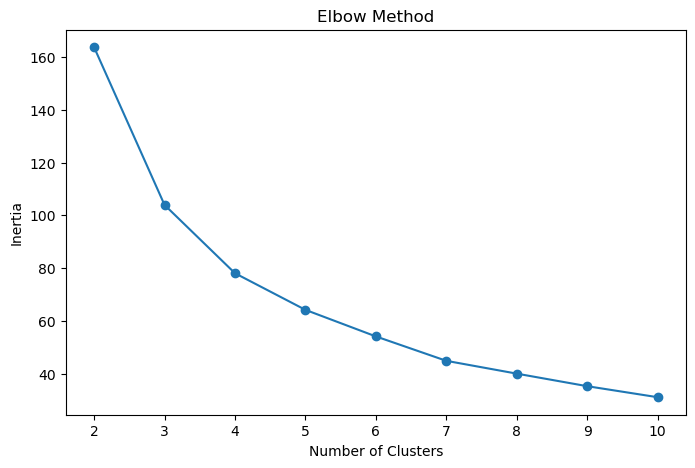

In [67]:
inertia = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


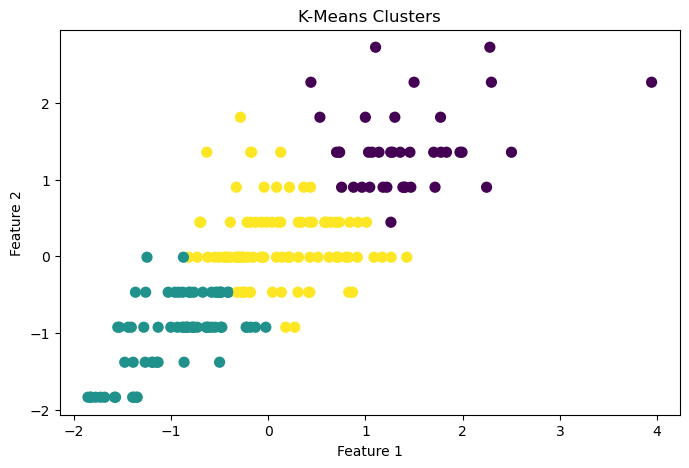

In [69]:
# Example: Scatter plot of first two features with cluster labels
plt.figure(figsize=(8, 5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
